  
<font size="5"> <div class="alert alert-block alert-info"> Introdução a Modelos Dinâmicos (IMD): Semana 3 (Aula P5) </div> </font> 
    
  <font size="5"> Licenciatura em Ciência de Dados </font>
  
  
  
  <font size="4"> **Diana Aldea Mendes**</font>
  
  
    
  <font size="3"> diana.mendes@iscte-iul.pt </font> 
  
  
  <font size="4"> ISCTE-IUL, 26 de fevereiro de 2024 </font>
  
   
 
    
 
  
  <font size="5"> <div class="alert alert-success" role="alert"> Exemplo de regressão linear múltipla, Pressupostos dos resíduos, outliers, previsão </div></font> 
  

  

In [1]:
library(car) # para bases de dados e gráficos
library(lmtest) # para testes de hipótese sobre os pressupostos dos resíduos
install.packages("olsrr") # para regressão (e testes de hipótese)
library(olsrr) # para regressão (e testes de hipótese)
install.packages("tseries") # teste de Jarque-Bera
library(tseries) # teste de Jarque-Bera


Warning message:
"package 'car' was built under R version 4.3.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.3.3"
Warning message:
"package 'lmtest' was built under R version 4.3.3"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.3.3"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Installing package into 'C:/Users/jricv/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'olsrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jricv\AppData\Local\Temp\RtmpKKCy6F\downloaded_packages


Warning message:
"package 'olsrr' was built under R version 4.3.3"

Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Installing package into 'C:/Users/jricv/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tseries' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tseries'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\jricv\AppData\Local\R\win-library\4.3\00LOCK\tseries\libs\x64\tseries.dll to C:\Users\jricv\AppData\Local\R\win-library\4.3\tseries\libs\x64\tseries.dll: Permission denied"
Warning message:
"restored 'tseries'"



The downloaded binary packages are in
	C:\Users\jricv\AppData\Local\Temp\RtmpKKCy6F\downloaded_packages


Warning message:
"package 'tseries' was built under R version 4.3.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
# importar a base de dados "state.x77" (R in-built)
# exemplo livro Kabacoff, Capítulo 8, pag. 178
# Estudar a relação entre a taxa de criminalidade (murder rate) de um estado e outras variáveis como:
# população (population), vencimento médio (average income), taxa de analfabetismo (illiteracy rate)
# número médio de dias com temperaturas negativas (frost levels) / por ano a corresponder a cada estado

# importar os dados como data.frame (para poder aplicar a função lm())

states <- as.data.frame(state.x77[, c("Murder", "Population", "Illiteracy", "Income", "Frost")])
head(states)


,Murder,Population,Illiteracy,Income,Frost
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,15.1,3615,2.1,3624,20
Alaska,11.3,365,1.5,6315,152
Arizona,7.8,2212,1.8,4530,15
Arkansas,10.1,2110,1.9,3378,65
California,10.3,21198,1.1,5114,20
Colorado,6.8,2541,0.7,4884,166


In [3]:
# correlação linear entre variáveis

summary(states)

cor(states)


     Murder         Population      Illiteracy        Income    
 Min.   : 1.400   Min.   :  365   Min.   :0.500   Min.   :3098  
 1st Qu.: 4.350   1st Qu.: 1080   1st Qu.:0.625   1st Qu.:3993  
 Median : 6.850   Median : 2838   Median :0.950   Median :4519  
 Mean   : 7.378   Mean   : 4246   Mean   :1.170   Mean   :4436  
 3rd Qu.:10.675   3rd Qu.: 4968   3rd Qu.:1.575   3rd Qu.:4814  
 Max.   :15.100   Max.   :21198   Max.   :2.800   Max.   :6315  
     Frost       
 Min.   :  0.00  
 1st Qu.: 66.25  
 Median :114.50  
 Mean   :104.46  
 3rd Qu.:139.75  
 Max.   :188.00  

,Murder,Population,Illiteracy,Income,Frost
Murder,1.0000000,0.3436428,0.7029752,-0.2300776,-0.5388834
Population,0.3436428,1.0000000,0.1076224,0.2082276,-0.3321525
Illiteracy,0.7029752,0.1076224,1.0000000,-0.4370752,-0.6719470
Income,-0.2300776,0.2082276,-0.4370752,1.0000000,0.2262822
Frost,-0.5388834,-0.3321525,-0.6719470,0.2262822,1.0000000


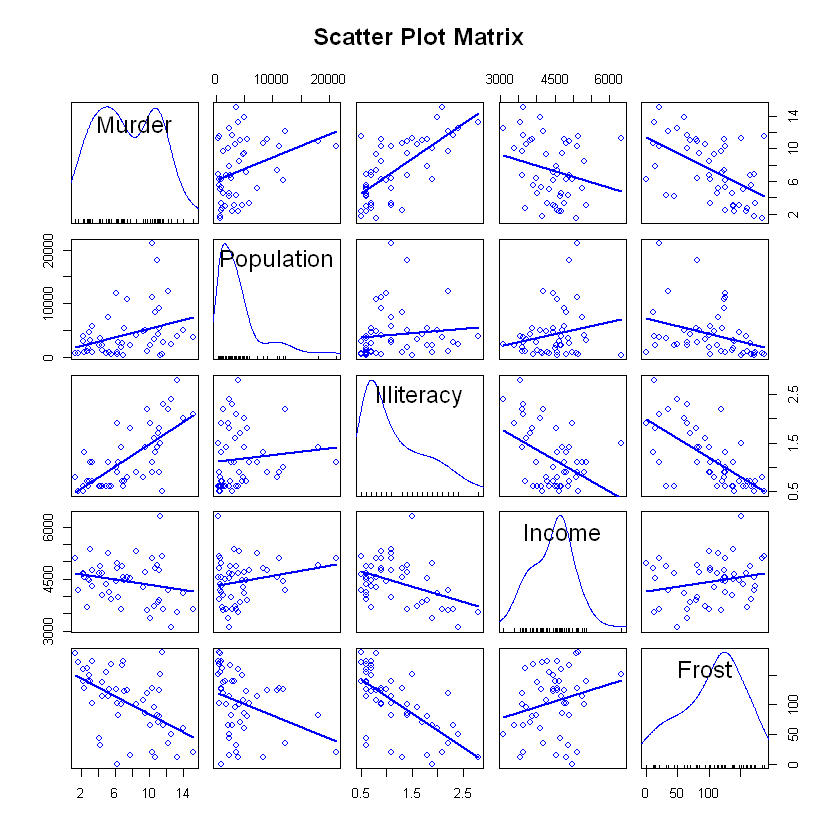

In [4]:
# matriz dos gráficos de dispersão
# a função scatterplotMatrix() faz parte da biblioteca "car"

scatterplotMatrix(states, smooth = FALSE, main = "Scatter Plot Matrix")


Observa-se que a taxa de criminalidade cresce com o aumento da população e da taxa de analfabetismo e decresce com o aumento dos níveis de rendimento e com o aumento dos dias com temperaturas negativas.

In [5]:
# modelo de regressão linear múltipla, usando na formula todas as variáveis independentes

fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)

summary(fit)



Call:
lm(formula = Murder ~ Population + Illiteracy + Income + Frost, 
    data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7960 -1.6495 -0.0811  1.4815  7.6210 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.235e+00  3.866e+00   0.319   0.7510    
Population  2.237e-04  9.052e-05   2.471   0.0173 *  
Illiteracy  4.143e+00  8.744e-01   4.738 2.19e-05 ***
Income      6.442e-05  6.837e-04   0.094   0.9253    
Frost       5.813e-04  1.005e-02   0.058   0.9541    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.535 on 45 degrees of freedom
Multiple R-squared:  0.567,	Adjusted R-squared:  0.5285 
F-statistic: 14.73 on 4 and 45 DF,  p-value: 9.133e-08


Interpretação dos coeficientes:
- No caso da regressão múltipla, os coeficientes de regressão indicam o crescimento na variável dependente para uma mudança unitária numa variável independente, sendo as outras consideradas constantes
- Por exemplo: o coeficiente da variável Illiteracy é 4.14, o que quer dizer que um crescimento de 1% na taxa de analfabetismo está associado com um crescimento de 4.14 p.p. (pontos percentuais e não "%" como estava) na taxa de criminalidade, sendo a população, rendimento e temperaturas negativas constantes (ou controladas).
- Como podemos observar do output, este coeficiente é significativamente diferente de zero (pois, o p-value<0.05), logo a variável Illiteracy é estatisticamente significativa.
- Também podemos observar que a variável Frost não é estatisticamente significativa, tendo o seu coeficiente nulo (p-value >0.05)
- levando em consideração o coeficiente de determinação R^2, dzemos que 57% da variância na taxa de criminalidade está explicada pelos preditores (variáveis independentes) do modelo.



In [ ]:
# verificamos se temos multicolinearidade
vif(fit)

Population Illiteracy     Income      Frost 
  1.245282   2.165848   1.345822   2.082547

In [ ]:
# como todos os valores são menores que 5, não temos multicolinearidade entre as variáveis independentes

In [8]:
# selecção das variáveis no modelo de regressão no sentido Backward

fit <- lm(Murder ~ Population + Illiteracy + Income + Frost, data = states)
step(fit, direction = "backward")


Start:  AIC=97.75
Murder ~ Population + Illiteracy + Income + Frost

             Df Sum of Sq    RSS     AIC
- Frost       1     0.021 289.19  95.753
- Income      1     0.057 289.22  95.759
<none>                    289.17  97.749
- Population  1    39.238 328.41 102.111
- Illiteracy  1   144.264 433.43 115.986

Step:  AIC=95.75
Murder ~ Population + Illiteracy + Income

             Df Sum of Sq    RSS     AIC
- Income      1     0.057 289.25  93.763
<none>                    289.19  95.753
- Population  1    43.658 332.85 100.783
- Illiteracy  1   236.196 525.38 123.605

Step:  AIC=93.76
Murder ~ Population + Illiteracy

             Df Sum of Sq    RSS     AIC
<none>                    289.25  93.763
- Population  1    48.517 337.76  99.516
- Illiteracy  1   299.646 588.89 127.311



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Coefficients:
(Intercept)   Population   Illiteracy  
  1.6515497    0.0002242    4.0807366  


In [9]:
# output do modelo escolhido (com base no menor AIC)

fit_n <- lm(Murder ~ Population + Illiteracy, data = states)
summary(fit_n)



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7652 -1.6561 -0.0898  1.4570  7.6758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.652e+00  8.101e-01   2.039  0.04713 *  
Population  2.242e-04  7.984e-05   2.808  0.00724 ** 
Illiteracy  4.081e+00  5.848e-01   6.978 8.83e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.481 on 47 degrees of freedom
Multiple R-squared:  0.5668,	Adjusted R-squared:  0.5484 
F-statistic: 30.75 on 2 and 47 DF,  p-value: 2.893e-09


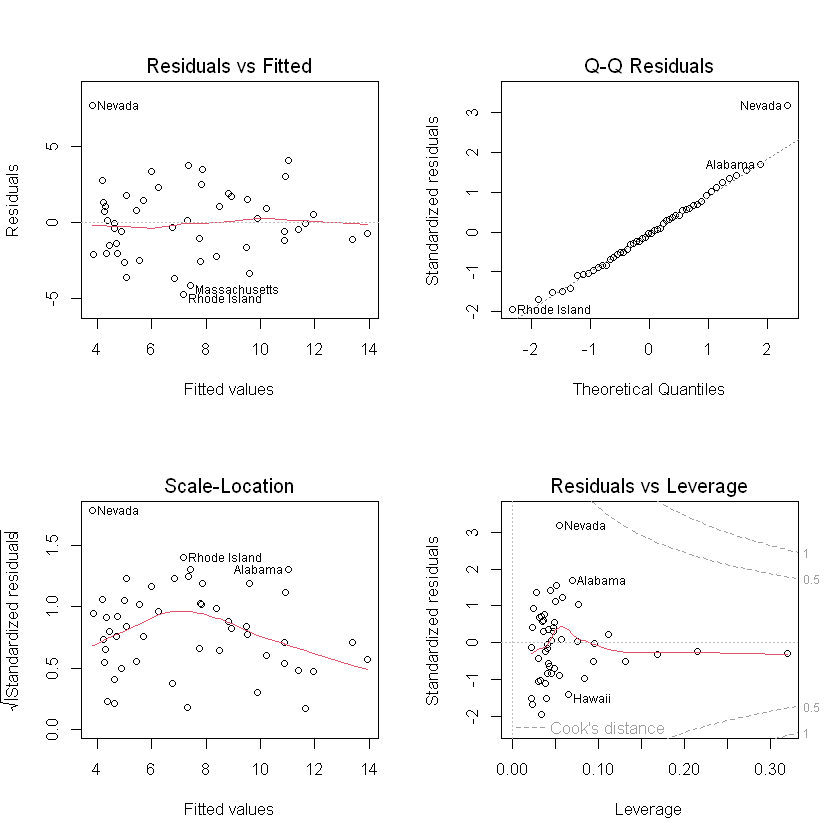

In [10]:
# representação gráfica sobre os resíduos

par(mfrow = c(2, 2))
plot(fit_n)


## Testes para a verificação dos pressupostos da regressão (resíduos)

In [11]:
# os resíduos tem a média nula

mean(fit_n$residuals)


[1] 1.122496e-16

In [12]:
# os resíduos tem a variância constante (homocedásticos)
# teste de Breusch-Pagan (H0: erros homocedásticos)

bptest(fit_n)



	studentized Breusch-Pagan test

data:  fit_n
BP = 1.856, df = 2, p-value = 0.3953


In [13]:
# p-value > 0.05, não rejeitamos a HO, logo o pressuposto é verificado (variância é constante)


In [14]:
# os resíduos são independentes (ausência de correlação)
# teste de Breusch-Godfrey (H0:resíduos independentes)

bgtest(fit_n)



	Breusch-Godfrey test for serial correlation of order up to 1

data:  fit_n
LM test = 2.0712, df = 1, p-value = 0.1501


In [15]:
# p-value > 0.05, não rejeitamos a HO, logo o pressuposto é verificado (resíduos independentes)


In [16]:
# os resíduos são normalmente distribuídos
# Teste de Jarque-Bera (H0: distribuição normal)

jarque.bera.test(fit_n$residuals)



	Jarque Bera Test

data:  fit_n$residuals
X-squared = 2.5053, df = 2, p-value = 0.2857


In [17]:
# p-value > 0.05, não rejeitamos a HO, logo o pressuposto é verificado (resíduos normalm. distribuídos)


In [18]:
install.packages("gvlma")


Installing package into 'C:/Users/jricv/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jricv\AppData\Local\Temp\RtmpKKCy6F\downloaded_packages


In [19]:
# Pressupostos dos resíduos: tudo de uma vez, usando a função gvlma da biblioteca com o mesmo nome.
library(gvlma)
gvmodel <- gvlma(fit_n)
summary(gvmodel)



Call:
lm(formula = Murder ~ Population + Illiteracy, data = states)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7652 -1.6561 -0.0898  1.4570  7.6758 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.652e+00  8.101e-01   2.039  0.04713 *  
Population  2.242e-04  7.984e-05   2.808  0.00724 ** 
Illiteracy  4.081e+00  5.848e-01   6.978 8.83e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.481 on 47 degrees of freedom
Multiple R-squared:  0.5668,	Adjusted R-squared:  0.5484 
F-statistic: 30.75 on 2 and 47 DF,  p-value: 2.893e-09


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit_n) 

                    Value p-value                Decision
Global Stat        3.1201  0.5379 Assumptions acceptable.
Skewness           1.7852  0.1815 Assumptions acceptable.
Kurtosis           0.7201  0.3961 Assumptions

In [20]:
# como todos os pressupostos são verificados podemos validar o modelo de regressão


In [21]:
# porque está o estado de Nevada fora do intervalo de confiança (no QQ-plot)?


In [22]:
# vejamos os valores associados ao estado Nevada

states["Nevada", ]


,Murder,Population,Illiteracy,Income,Frost
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nevada,11.5,590,0.5,5149,188


In [23]:
# valor da taxa de criminalidade predito pela regressão

fitted(fit_n)["Nevada"]


Nevada 
3.824188

In [24]:
# valor resídual associado pela d. normal

residuals(fit_n)["Nevada"]


Nevada 
7.675812

In [25]:
# valor residual associado pela d. t-student
rstudent(fit_n)["Nevada"]


Nevada 
3.554771

O estado Nevada tem uma taxa de criminalidade elevada (cerca de 11.5%), mas o modelo de regressão aplicado sub-estima o valor da taxa, pois temos apenas uma previsão de 3.9%

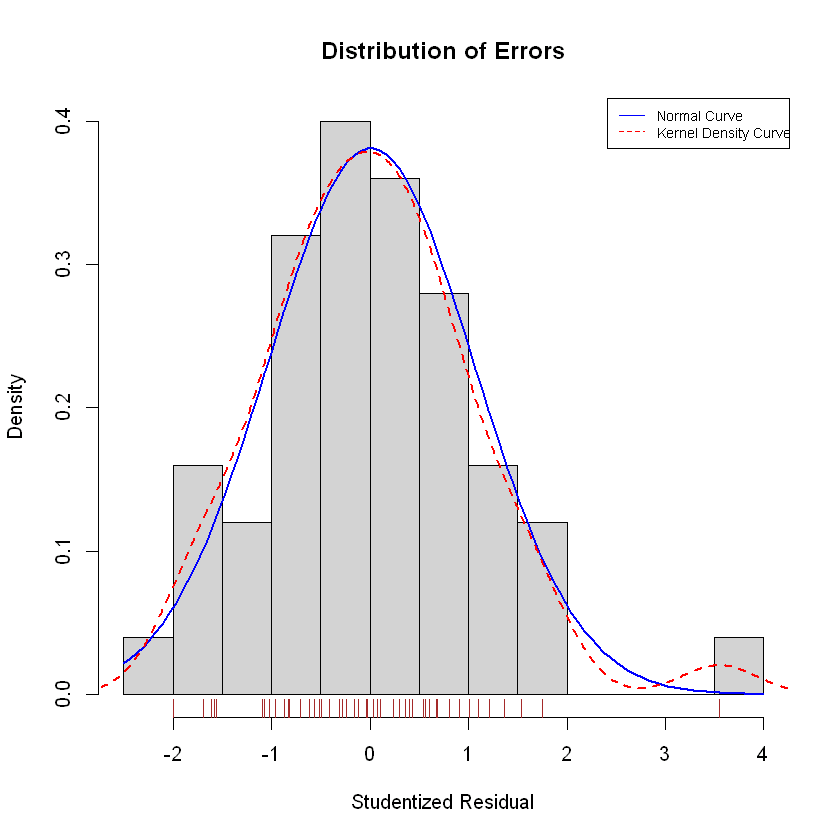

In [26]:
# representação gráfica do histograma dos resíduos e das curvas de densidade normal e empírica (kernel)

residplot <- function(fit, nbreaks = 10) {
    z <- rstudent(fit)
    hist(z,
        breaks = nbreaks, freq = FALSE,
        xlab = "Studentized Residual",
        main = "Distribution of Errors"
    )
    rug(jitter(z), col = "brown")
    curve(dnorm(x, mean = mean(z), sd = sd(z)),
        add = TRUE, col = "blue", lwd = 2
    )
    lines(density(z)$x, density(z)$y,
        col = "red", lwd = 2, lty = 2
    )
    legend("topright",
        legend = c("Normal Curve", "Kernel Density Curve"),
        lty = 1:2, col = c("blue", "red"), cex = .7
    )
}
residplot(fit)


In [27]:
# vamos fazer um teste de outlier para o modelo (por causa do estado Nevada)
outlierTest(fit_n)


       rstudent unadjusted p-value Bonferroni p
Nevada 3.554771         0.00088849     0.044425

In [28]:
# como o p-value = 0.044 < 0.05, rejeita-se a H0, logo o estado Nevada é identificado como um outlier


In [29]:
pr <- predict(fit_n)
pr


Alabama         Alaska        Arizona       Arkansas     California 
     11.031529       7.854483       9.492775       9.877982      10.892657 
      Colorado    Connecticut       Delaware        Florida        Georgia 
      5.077722       6.835337       5.454016       8.812096      10.918485 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
      9.599543       4.282255       7.834425       5.699166       4.333315 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
      4.611136       8.940047      13.930865       4.745254       6.248308 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
      7.443778       7.366772       4.979025      11.970137       5.984834 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
      4.267235       4.446135       3.824188       4.690105       7.784317 
    New Mexico       New York North Carolina   North Dakota           Ohio 
     10.885639      11.416969      10.216672       5.058946       7.322777 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
      6.749025       4.612033       8.391134       7.165225      11.668552 
  South Dakota      Tennessee          Texas           Utah        Vermont 
      3.844589       9.524331      13.372536       4.369688       4.205808 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
      8.481252       4.897870       7.767892       5.536855       4.184286

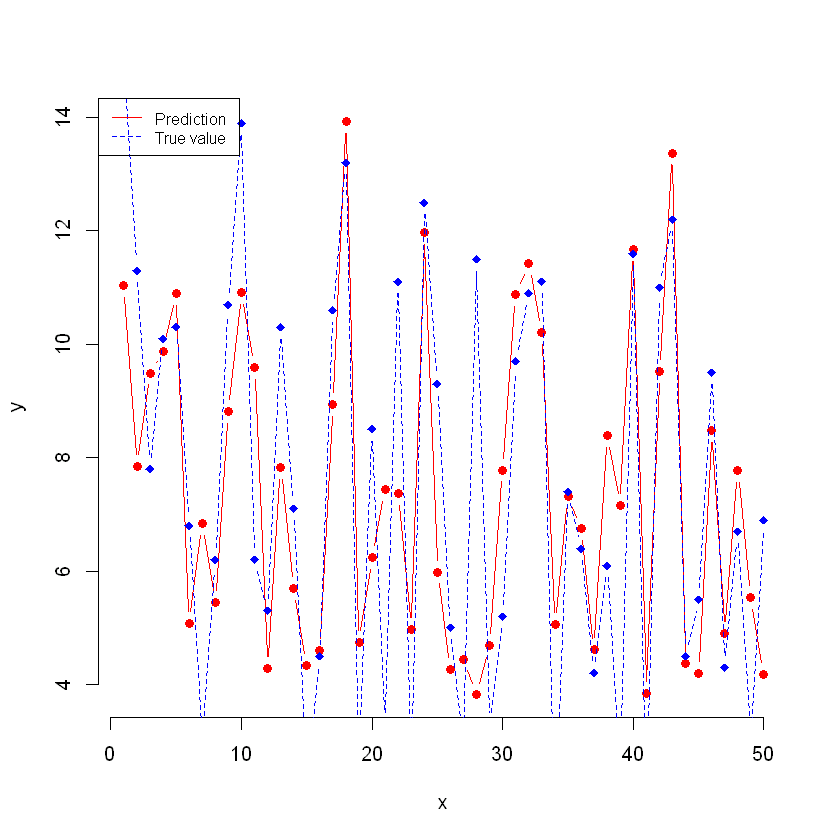

In [30]:
plot(pr,
     type = "b", frame = FALSE, pch = 19,
     col = "red", xlab = "x", ylab = "y"
)
# Add a second line
lines(states$Murder, pch = 18, col = "blue", type = "b", lty = 2)
## Add a legend to the plot
legend("topleft",
     legend = c("Prediction", "True value"),
     col = c("red", "blue"), lty = 1:2, cex = 0.8
)


In [31]:
# novos pontos

new.points <- data.frame(Population = c(4500, 911, 2037), Illiteracy = c(1.2, 1.9, 0.7))
new.points


Population,Illiteracy
<dbl>,<dbl>
4500,1.2
911,1.9
2037,0.7


In [32]:
# previsão out-of-sample (fora da amostra) com base no modelo de regressão validado

predict(fit_n, newdata = new.points)


1        2        3 
7.557271 9.609183 4.964732

## TPC 1

1. Divide a amostra em conjunto de treino e conjunto de teste (85%-15%)
2. Determina um modelo de regressão linear que melhor se ajust para o conjunto de treino.
3. Verifica os pressupostos dos resíduos
4. Determine o erro de previsão (sobre o conjunto de teste)
